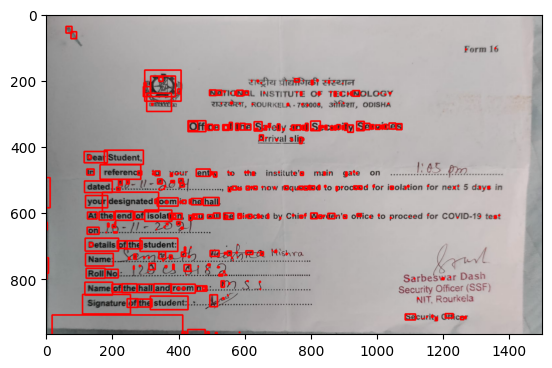

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def expand_bounding_box(image, contour, padding_factor):
    # Fit a rotated rectangle around the contour
    rect = cv2.minAreaRect(contour)
    box = cv2.boxPoints(rect)
    box = np.int0(box)

    # Calculate the padding to expand the bounding box
    padding = int(padding_factor * max(rect[1]))

    # Expand the bounding box by adding the padding
    expanded_x = max(0, min(box[:, 0]) - padding)
    expanded_y = max(0, min(box[:, 1]) - padding)
    expanded_w = min(image.shape[1] - 1, max(box[:, 0]) - expanded_x + padding)
    expanded_h = min(image.shape[0] - 1, max(box[:, 1]) - expanded_y + padding)

    return expanded_x, expanded_y, expanded_w, expanded_h

frames = cv2.imread("./test5.jpg")
stretch = frames.copy()  # Frame is the imported image

# Increasing the contrast of the image
# CLAHE (Contrast Limited Adaptive Histogram Equalization)
clahe = cv2.createCLAHE(clipLimit=2., tileGridSize=(8, 8))
lab = cv2.cvtColor(stretch, cv2.COLOR_BGR2LAB)  # convert from BGR to LAB color space
l, a, b = cv2.split(lab)  # split on 3 different channels

l2 = clahe.apply(l)  # apply CLAHE to the L-channel

lab = cv2.merge((l2, a, b))  # merge channels
img2 = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)  # convert from LAB to BG

# Convert to gray
gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# Blur
smooth = cv2.GaussianBlur(gray, (11, 11), 0)

img2 = cv2.cvtColor(smooth, cv2.COLOR_GRAY2BGR)

frame_HSV = cv2.cvtColor(img2, cv2.COLOR_BGR2HSV)
frame_threshold = cv2.inRange(frame_HSV, (0, 0, 10), (180, 255, 80))

# Apply morphological operations
kernel = np.ones((5, 5), np.uint8)
frame_threshold = cv2.morphologyEx(frame_threshold, cv2.MORPH_CLOSE, kernel)

contours, hierarchy = cv2.findContours(frame_threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

areas = [cv2.contourArea(c) for c in contours]
sorted_areas = np.sort(areas)
largestContourArea = sorted_areas[-1] * 0.1
largestContour = 0
for cnt in contours:
    contourArea = cv2.contourArea(cnt)
    expanded_x, expanded_y, expanded_w, expanded_h = expand_bounding_box(frames, cnt, padding_factor=0.15)

    cv2.rectangle(frames, (expanded_x, expanded_y), (expanded_x + expanded_w, expanded_y + expanded_h),
                    (255, 0, 0), 4)

plt.imshow(frames)
plt.show()
